# IMPORT PACKAGES

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

# Import CSV

In [2]:
airbnb_sfo = pd.read_csv('../../../raw_data/sfo/listings-1.csv')

# Set New Scores

In [3]:
airbnb_sfo['new_agg_scores'] = airbnb_sfo['reviews_per_month'] * airbnb_sfo['review_scores_rating'] / 10

airbnb_sfo['new_agg_scores'].fillna(0, inplace = True)

# Drop Irrelevant Columns

In [4]:
#review_scores_rating
relevant_colmuns = ['price','amenities','new_agg_scores','number_of_reviews','host_verifications','host_listings_count', 'host_response_time', 'host_response_rate', 'host_acceptance_rate','host_is_superhost','host_has_profile_pic','host_identity_verified','accommodates','bathrooms','bedrooms','beds','availability_365','instant_bookable']
for i in airbnb_sfo.columns:
    if i not in relevant_colmuns:
        airbnb_sfo = airbnb_sfo.drop(i, axis = 1, )

# Own Functions

In [5]:
def to_deci(x):
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

def to_time(x):
    if x == 'within an hour':
        x='1'
    elif x == 'within a few hours':
        x='4'
    elif x == 'within a day':
        x='24'
    elif x == 'a few days or more':
        x='48'
    else:
        x='96'      
    return x

def to_int(x):
    if x=='f':
        x=x.replace('f','0')
    elif x=='t':
        x=x.replace('t','1')
    else:
        x= '0'
    return int(x)

def to_len(x):
    x = x[1:-1]
    x = x.split(',')
    x = len(x)
    return x

def to_price(x):
    if type(x)==str:
        x=x.replace('$','')
        x=x.replace(',','')
        x=float(x)    
    return (x)

In [6]:
airbnb_sfo

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,price,availability_365,number_of_reviews,instant_bookable,new_agg_scores
0,within an hour,100%,99%,t,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",$132.00,177,257,f,18.527
1,within a day,60%,83%,f,2,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",$235.00,365,111,f,7.938
2,within a few hours,100%,100%,f,10,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",$56.00,365,19,f,1.176
3,within a few hours,100%,100%,f,10,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",$56.00,365,8,f,1.023
4,within a few hours,100%,0%,f,2,"['email', 'phone', 'reviews', 'kba']",t,t,4,1.5,2.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Car...",$750.00,365,28,f,2.037
5,within an hour,100%,96%,t,2,"['email', 'phone', 'reviews', 'offline_governm...",t,t,3,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Children\u2019s book...",$169.00,179,736,f,53.606
6,within a few hours,100%,95%,t,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,2,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Iron"", ""Dryer"", ""Cof...",$150.00,349,531,t,37.882
7,within a day,100%,100%,t,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,4,1.0,2.0,3.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",$200.00,365,337,f,24.288
8,NaN,NaN,0%,f,0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,2,1.0,NaN,1.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""Elevato...",$120.00,364,18,f,1.683
9,within a few hours,97%,79%,t,38,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,3,1.0,3.0,3.0,"[""Refrigerator"", ""Heating"", ""Kitchen"", ""Wifi"",...",$170.00,22,37,f,2.492


In [7]:
airbnb_sfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 18 columns):
host_response_time        5321 non-null object
host_response_rate        5321 non-null object
host_acceptance_rate      6393 non-null object
host_is_superhost         7274 non-null object
host_listings_count       7274 non-null int64
host_verifications        7274 non-null object
host_has_profile_pic      7274 non-null object
host_identity_verified    7274 non-null object
accommodates              7274 non-null int64
bathrooms                 7185 non-null float64
bedrooms                  6430 non-null float64
beds                      7234 non-null float64
amenities                 7274 non-null object
price                     7274 non-null object
availability_365          7274 non-null int64
number_of_reviews         7274 non-null int64
instant_bookable          7274 non-null object
new_agg_scores            7274 non-null float64
dtypes: float64(4), int64(4), object(10)
memory

# Change Data Type of Columns and fill missing data

In [8]:
airbnb_sfo['host_response_rate'] = airbnb_sfo['host_response_rate'].fillna('0%').apply(to_deci)
airbnb_sfo['host_acceptance_rate'] = airbnb_sfo['host_acceptance_rate'].fillna('0%').apply(to_deci)

airbnb_sfo['host_response_time'] = airbnb_sfo['host_response_time'].apply(to_time).astype(int)

airbnb_sfo['host_is_superhost'] = airbnb_sfo['host_is_superhost'].apply(to_int)
airbnb_sfo['host_has_profile_pic'] = airbnb_sfo['host_has_profile_pic'].apply(to_int)
airbnb_sfo['host_identity_verified'] = airbnb_sfo['host_identity_verified'].apply(to_int)
airbnb_sfo['instant_bookable'] = airbnb_sfo['instant_bookable'].apply(to_int)

airbnb_sfo['host_verifications'] = airbnb_sfo['host_verifications'].apply(to_len)
airbnb_sfo['amenities'] = airbnb_sfo['amenities'].apply(to_len)

airbnb_sfo['bathrooms'] = airbnb_sfo['host_response_rate'].fillna(0)
airbnb_sfo['bedrooms'] = airbnb_sfo['host_response_rate'].fillna(0)

airbnb_sfo['price'] = airbnb_sfo['price'].apply(to_price)

In [9]:
airbnb_sfo.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,price,availability_365,number_of_reviews,instant_bookable,new_agg_scores
0,1,1.0,0.99,1,1,5,1,1,3,1.0,1.0,2.0,30,132.0,177,257,0,18.527
1,24,0.6,0.83,0,2,5,1,1,5,0.6,0.6,3.0,15,235.0,365,111,0,7.938
2,4,1.0,1.00,0,10,5,1,0,2,1.0,1.0,1.0,15,56.0,365,19,0,1.176
3,4,1.0,1.00,0,10,5,1,0,2,1.0,1.0,1.0,14,56.0,365,8,0,1.023
4,4,1.0,0.00,0,2,4,1,1,4,1.0,1.0,2.0,25,750.0,365,28,0,2.037


# Correlation Analysis

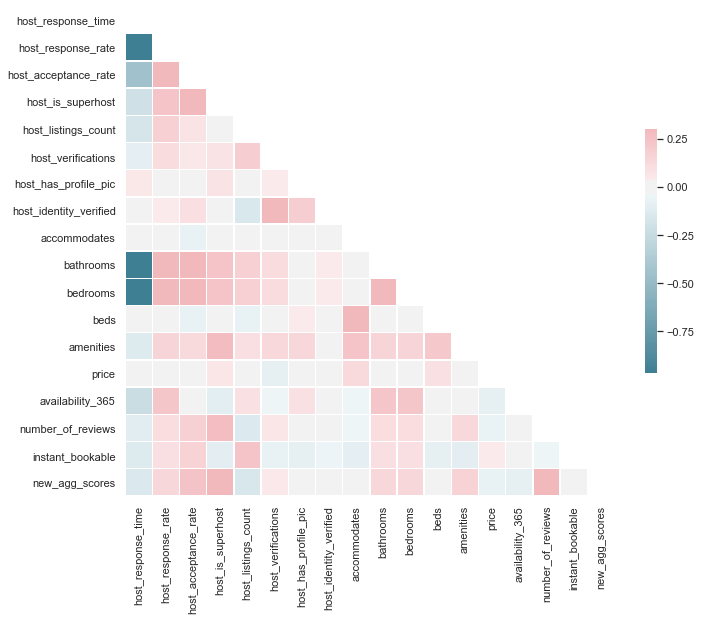

In [10]:
# calculate corr
corr = airbnb_sfo.corr()

# set up heatmap
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
results = airbnb_sfo.corr().unstack().sort_values(ascending=False)
print('The correlation of the new_score_reviews against all:', results['new_agg_scores'][1:-1])

The correlation of the new_score_reviews against all: number_of_reviews         0.788832
host_is_superhost         0.334415
host_acceptance_rate      0.240659
amenities                 0.159159
bedrooms                  0.138321
host_response_rate        0.138321
bathrooms                 0.138321
host_verifications        0.042696
instant_bookable          0.006103
host_identity_verified    0.005362
accommodates             -0.014628
host_has_profile_pic     -0.015856
beds                     -0.020415
price                    -0.073028
availability_365         -0.080548
host_response_time       -0.138738
dtype: float64
